In [3]:
!pip install pandas_datareader
!pip install yfinance
!pip install matplotlib

  Using cached yfinance-0.1.72-py2.py3-none-any.whl (27 kB)
  Using cached multitasking-0.0.10-py3-none-any.whl
     ---------------------------------------- 7.2/7.2 MB 8.7 MB/s eta 0:00:00
     ------------------------------------- 930.9/930.9 kB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00


In [8]:
import yfinance as yf
data = yf.download('AAPL', '2019-08-01','2020-08-01')
ts = data['Open']
print(ts.head())

[*********************100%***********************]  1 of 1 completed
Date
2019-08-01    53.474998
2019-08-02    51.382500
2019-08-05    49.497501
2019-08-06    49.077499
2019-08-07    48.852501
Name: Open, dtype: float64


[*********************100%***********************]  1 of 1 completed


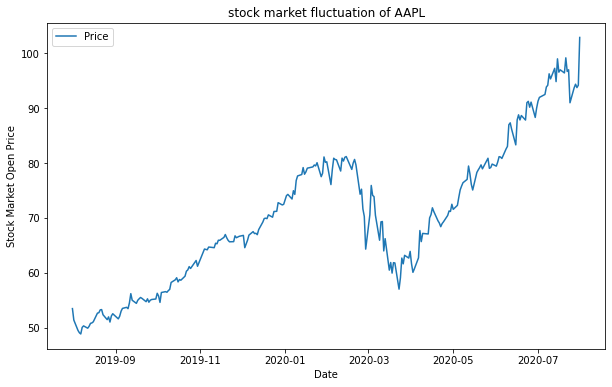

In [9]:
#1. matplotlib.pyplot api
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download('AAPL', '2019-08-01','2020-08-01')
ts = data['Open']
plt.figure(figsize=(10,6)) #그래프 크기
plt.plot(ts)
plt.legend(labels=['Price'], loc='best') #범례
plt.title('stock market fluctuation of AAPL')
plt.xlabel('Date')
plt.ylabel('Stock Market Open Price')
plt.show()

In [5]:
#2. 객체 지향 API
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()

import numpy as np
np.random.seed(6)

x = np.random.randn(20000)
ax = fig.add_subplot(111)
ax.hist(x,100)
ax.set_title('Artist layer histogram')
fig.savefig('Matplotlib_histogram.png')

[*********************100%***********************]  1 of 1 completed


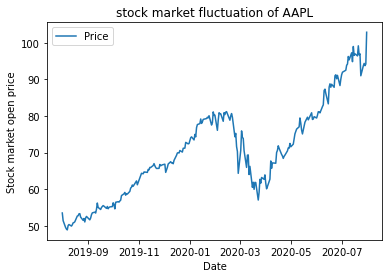

In [10]:
#3. pyplot api, 객체 지향 api
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download('AAPL', '2019-08-01','2020-08-01')
ts = data['Open']

fig = plt.figure()
ax = fig.subplots() #fig, ax=plt.subplots()

ax.plot(ts)
ax.set_title('stock market fluctuation of AAPL')
ax.legend(labels=['Price'],loc='best')
ax.set_xlabel('Date')
ax.set_ylabel('Stock market open price')
plt.show()

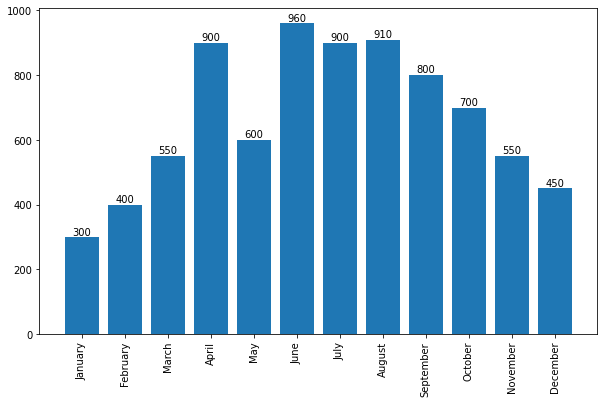

In [5]:
# Bar Plot

import matplotlib.pyplot as plt
import numpy as np
import calendar

month_list = [x for x in range(1,13)]
sold_list = [300, 400, 550, 900, 600, 960, 900, 910, 800, 700, 550, 450]

fig, ax = plt.subplots(figsize=(10,6)) #객체 지향으로 그래프 작성하기 위해 fig, ax 선언
plt.xticks(month_list, calendar.month_name[1:13], rotation=90)
plot = ax.bar(month_list, sold_list)

#각 그래프에 숫자 추가하기

for rect in plot:
    height = rect.get_height()
    #ax.text(): 그래프에 주석 추가
    ax.text(rect.get_x()+rect.get_width()/2., 1.002*height, '%d'%int(height), ha='center', va='bottom')

plt.show()

In [7]:
!pip install seaborn

     -------------------------------------- 292.8/292.8 kB 6.0 MB/s eta 0:00:00


C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_19964/3063287251.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


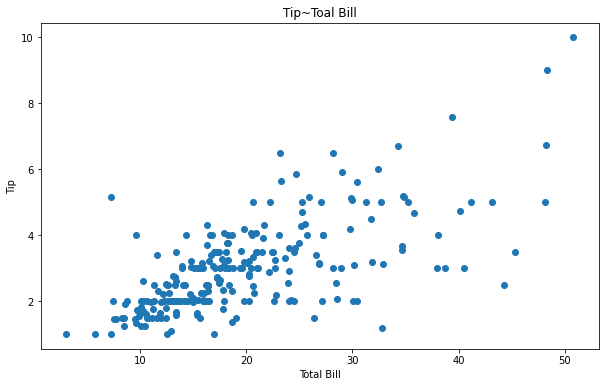

In [9]:
#산점도 그래프: 두 수치형 변수의 분포와 상관관계 확인
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
x = tips['total_bill']
y = tips['tip']

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x,y)
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.set_title('Tip~Toal Bill')

fig.show()

C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_19964/311271706.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


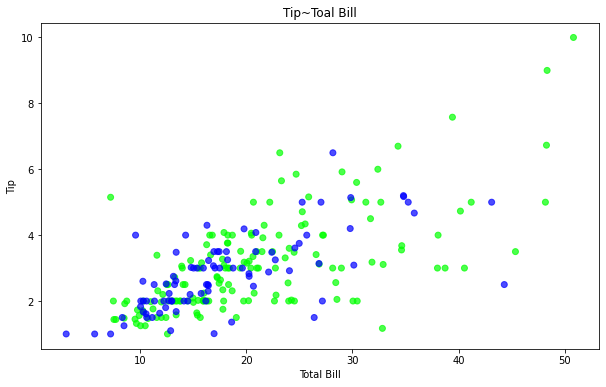

In [12]:
#산점도 그래프 보완
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
x = tips['total_bill']
y = tips['tip']

tips['sex_color'] = tips['sex'].map({"Female":"#0000FF", "Male":"#00FF00"}) #map 함수 이용해 sex 별로 다른 색 삽입

fig, ax = plt.subplots(figsize=(10,6))

for label, data in tips.groupby('sex'): #sex에 따라 두 그룹으로 만들기
    ax.scatter(data['total_bill'], data['tip'],label=label,color=data['sex_color'],alpha=0.7)
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.set_title('Tip~Toal Bill')

fig.show()

C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_19964/1330405547.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


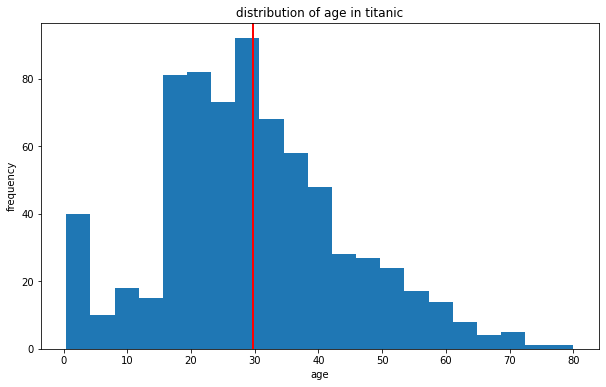

In [17]:
#히스토그램: 연속형 변수의 분포
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

titanic = sns.load_dataset('titanic')
age = titanic['age']

nbins = 21

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(age, bins=nbins)
ax.set_xlabel("age")
ax.set_ylabel("frequency")
ax.set_title("distribution of age in titanic")
ax.axvline(x=age.mean(), linewidth=2, color='r') #데이터 평균선 표현
fig.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x27be34d1220>,
 'caps': [<matplotlib.lines.Line2D at 0x27be34d17c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27be14b2f10>,
 'medians': [<matplotlib.lines.Line2D at 0x27be34d1d60>,
 'fliers': [<matplotlib.lines.Line2D at 0x27be34e0070>,
 'means': []}

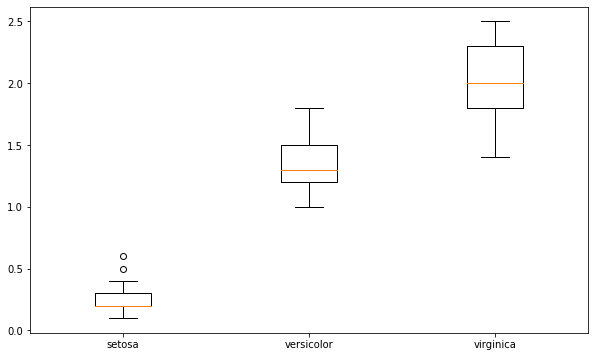

In [1]:
#Box Plot: 범주형 데이터를 기준으로 수치형 데이터의 분포 파악. 최솟값, 1분위값, 중간값, 3분위값, 최댓값 제공
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

data = [iris[iris['species']=='setosa']['petal_width'],\
    iris[iris['species']=='versicolor']['petal_width'],\
        iris[iris['species']=='virginica']['petal_width']]


fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(data, labels=['setosa','versicolor','virginica'])

C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_18000/2295727313.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(flights.columns, rotation=20)
C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_18000/2295727313.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(flights.index, rotation=10)
C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_18000/2295727313.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


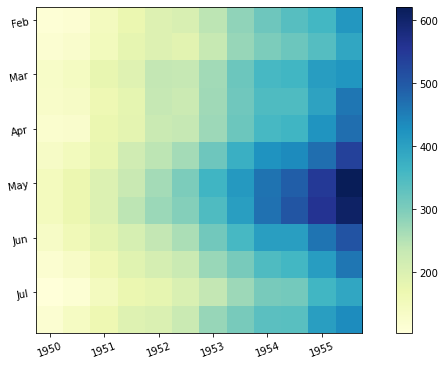

In [3]:
#heat map
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

flights = sns.load_dataset('flights')
flights = flights.pivot("month","year","passengers")

fig, ax = plt.subplots(figsize=(12,6))
im = ax.imshow(flights, cmap='YlGnBu')
ax.set_xticklabels(flights.columns, rotation=20)
ax.set_yticklabels(flights.index, rotation=10)
fig.colorbar(im)

fig.show()

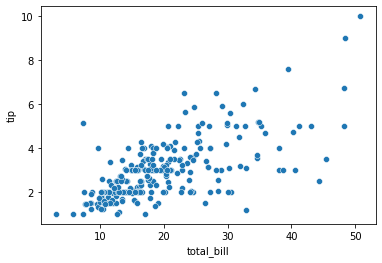

In [4]:
#seaborn library: matplotlib와 다르게 별도의 가공 없이 x,y축 입력만으로도 매우 쉽게 시각화 가능
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")

sns.scatterplot(x='total_bill', y="tip", data=tips)
plt.show()

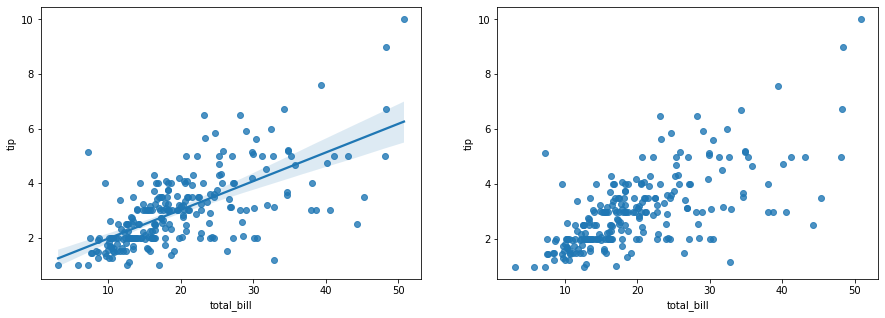

In [7]:
#회귀선이 있는 산점도 by regplot(), relplot()
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[0], fit_reg=True)
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[1], fit_reg=False)

plt.show()

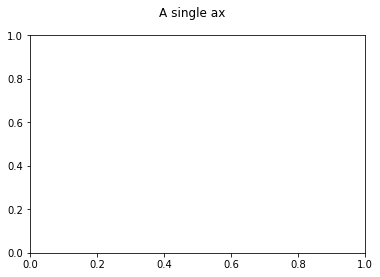

In [9]:
# Matplotlib와 seaborn을 동시에 활용한 subplotting 기법
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.suptitle('A single ax')
plt.show()

C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_18000/4183475915.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


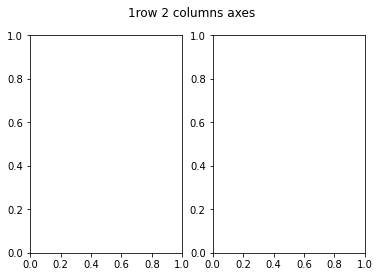

In [10]:
#subplots()내에 행, 열 추가해서 그래프 추가하기
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2)
fig.suptitle("1row 2 columns axes")
fig.show()

C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_18000/3286984075.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


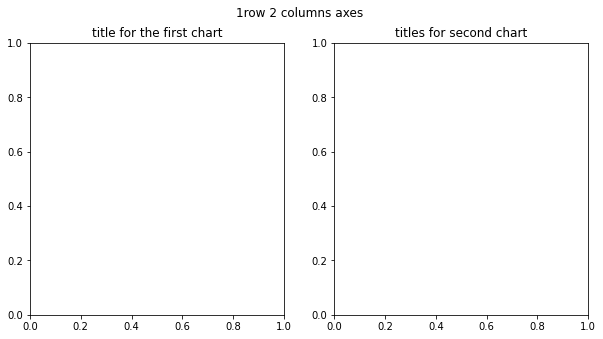

In [11]:
# 각 그래프에 제목 추가하기
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("1row 2 columns axes")

ax[0].set_title('title for the first chart')
ax[1].set_title('titles for second chart')
fig.show()

C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_18000/765780965.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


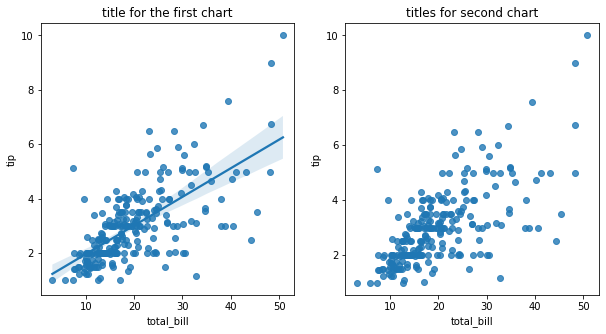

In [12]:
#그래프 넣기
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5))

#그래프 추가
sns.regplot(x='total_bill', y='tip', data=tips, ax=ax[0],fit_reg=True)
sns.regplot(x='total_bill', y='tip', data=tips, ax=ax[1],fit_reg=False)

ax[0].set_title('title for the first chart')
ax[1].set_title('titles for second chart')
fig.show()

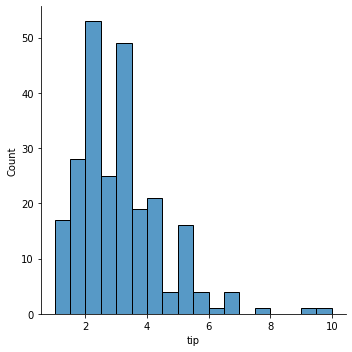

In [13]:
#히스토그램: 연속형 데이터의 분포(빈도수), by displot()
tips=sns.load_dataset("tips")
sns.displot(x='tip',data=tips)
plt.show()


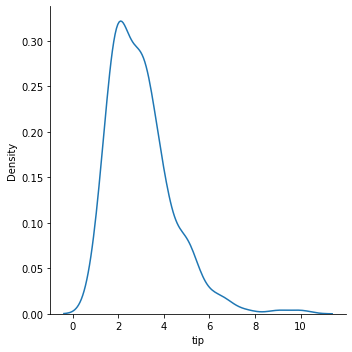

In [14]:
#커널 밀도 그래프:데이터 비율
sns.displot(x='tip',kind='kde',data=tips)
plt.show()

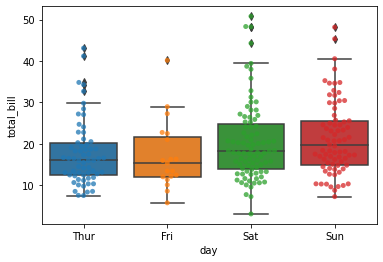

In [16]:
#boxplot그래프. seaborn에서는 boxplot(), violinplot()함수 사용.
##boxplot외에 swarmplot()함수 구현시 데이터 분포도 같이 확인 가능

sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, alpha=.75) #데이터 분포 확인
plt.show()

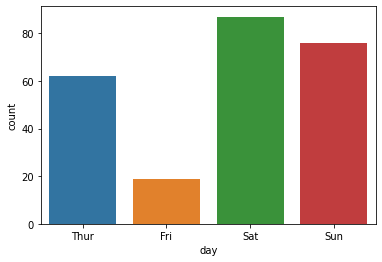

In [17]:
#중요!!! 막대 그래프에 텍스트 추가하기

sns.countplot(x='day', data=tips)
plt.show()

In [19]:
# 막대 데이터 정렬하기 by value_counts()
## 1. 데이터 빈도수 내림차순 출력 (오름차순으로 출력하고 싶은 경우 value_counts(ascending=true) 로 설정)

print(tips['day'].value_counts())
print(tips['day'].value_counts().index)
print(tips['day'].value_counts().values)

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')
[87 76 62 19]


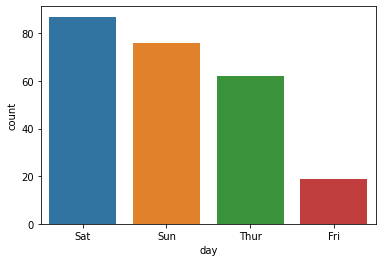

In [23]:
# 2. value_counts().index를 countplot()의 인수로 추가하기

sns.countplot(x='day', data=tips, order=tips['day'].value_counts().index)
plt.show()

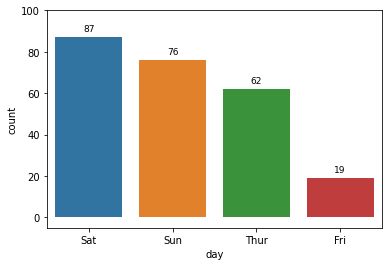

In [24]:
# 3. 각 막대그래프에 숫자 표시하기
ax = sns.countplot(x='day', data=tips, order=tips['day'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+3, height, ha='center', size=9)

ax.set_ylim(-5, 100)
plt.show()

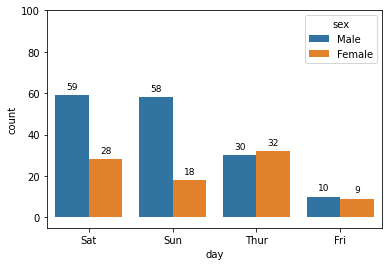

In [25]:
# 4. Hue 옵션을 추가해서 그룹간 비교하기

ax = sns.countplot(x='day', data=tips, hue='sex', dodge=True, order=tips['day'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+3, height, ha='center', size=9)

ax.set_ylim(-5, 100)
plt.show()

In [2]:
#상관관계 분석
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mpg = sns.load_dataset("mpg") #자동차 연비 관련 데이터
print(mpg.shape)

num_mpg = mpg.select_dtypes(include=np.number) #변수를 데이터타입에 따라 선별적으로 선택. 이때 np.number은 모든 수치에 대한 것을 의미
print(num_mpg.shape)

(398, 9)
(398, 7)


In [4]:
#실제로 수치형 변수만 추출되는 것을 확인할 수 있다
num_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [5]:
# corr(): 상관계수 구하기
num_mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


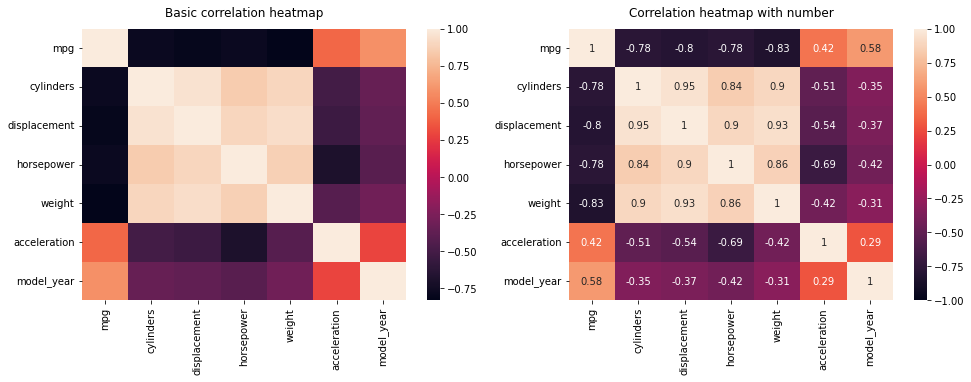

In [8]:
# 상관관계를 기반으로 히트맵 그래프 작성. 숫자 없는 그래프 왼쪽, 숫자 있는 그래프 오른쪽 배치
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.heatmap(num_mpg.corr(), ax=ax[0])
ax[0].set_title('Basic correlation heatmap', pad=12)

sns.heatmap(num_mpg.corr(), vmin=-1, vmax=1, annot=True, ax=ax[1])
ax[1].set_title('Correlation heatmap with number', pad=12)

plt.show()

In [9]:
#heatmap 우측 제거하기
print(int(True))
np.triu(np.ones_like(num_mpg.corr()))

1


array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [10]:
mask = np.triu(np.ones_like(num_mpg.corr(), dtype=np.bool))
print(mask)

[[ True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True]
 [False False  True  True  True  True  True]
 [False False False  True  True  True  True]
 [False False False False  True  True  True]
 [False False False False False  True  True]
 [False False False False False False  True]]


C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_29452/350531848.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(num_mpg.corr(), dtype=np.bool))


C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_29452/2722026872.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


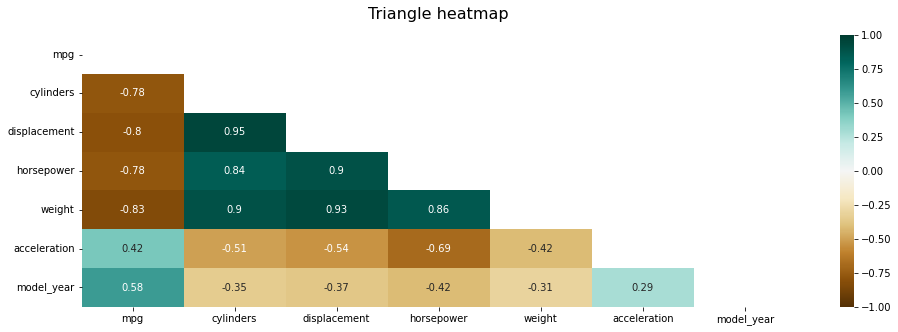

In [11]:
#true 값만 heatmap 형태로 추가 >> true 값에 해당하는 cell만 사라짐
fig, ax = plt.subplots(figsize=(16,5))

ax = sns.heatmap(num_mpg.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="BrBG", cbar=True)
ax.set_title('Triangle heatmap', pad=16, size=16)
fig.show()

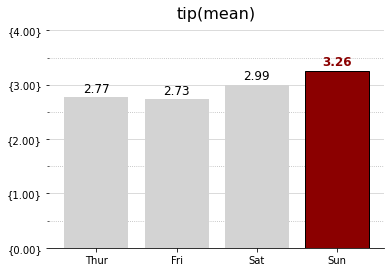

In [17]:
#블로그 참고하여 그래프 그리기
import matplotlib.pyplot as plt
# 축의 눈금 조정하는 라이브러리 ticker
# MultipleLocator: 눈금을 숫자의 배수만큼 표시, AutoMinor: 두개 주 눈금 사이 보조눈금 4~5개씩 FuncFormatter: 사용자정의함수로 구현된 label의 세팅 도움
from matplotlib.ticker import(MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

def plot_example(ax, zorder=0):
    ax.bar(tips_day["day"], tips_day["tip"], color="lightgray", zorder=zorder)
    ax.set_title("tip(mean)", fontsize=16, pad=12)

    #values
    h_pad = 0.1
    for i in range(4):
        fontweight="normal"
        color="k"
        if i==3:
            fontweight="bold"
            color="darkred"
        ax.text(i, tips_day["tip"].loc[i]+h_pad,f"{tips_day['tip'].loc[i]:0.2f}",
                horizontalalignment='center',fontsize=12, fontweight=fontweight, color=color)

    #sunday
    ax.patches[3].set_facecolor("darkred") #index3의 막대그래프
    ax.patches[3].set_edgecolor("black")

    #set range
    ax.set_ylim(0,4) #y축 범위 지정
    return ax

def major_formatter(x, pos):
    return "{%.2f}"%x
    
formatter = FuncFormatter(major_formatter)

tips = sns.load_dataset("tips")
tips_day = tips.groupby("day").mean().reset_index()

#시각화 구현: 객체 지향 형태로 시각화 구현하고 ax로 리턴
fig, ax = plt.subplots()
ax = plot_example(ax, zorder=2)


#사각형 테두리 없에기 by spine

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(1)) #주요 눈금 단위 1씩 변경
ax.yaxis.set_major_formatter(formatter) #앞서 정의된 라벨 형태를 눈금에 추가
ax.yaxis.set_minor_locator(MultipleLocator(0.5)) #보조눈금단위 0.5를 주요눈금 사이에 추가

#격자 그리기
ax.grid(axis="y", which="major", color="lightgray")
ax.grid(axis="y", which="minor", ls=":")

C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_11228/2551149281.py:68: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


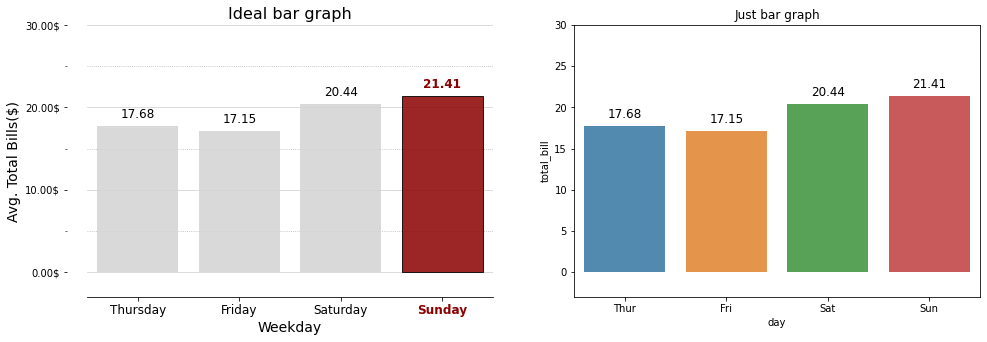

In [6]:
#업그레이드된 시각화 구현
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

tips = sns.load_dataset('tips')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

def major_formatter(x, pos):
    return "%.2f$"%x

formatter = FuncFormatter(major_formatter)

#Idel bar graph

ax0 = sns.barplot(x="day", y="total_bill", data=tips, ci=None, color='lightgray', alpha=0.85, zorder=2, ax=ax[0])
#ci: 오차 막대

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False)[0],2)

for p in ax0.patches:
    fontweight = "normal"
    color = 'k'
    height = np.round(p.get_height(),2)
    if h_mean == height:
        fontweight = "bold"
        color = "darkred"
        p.set_facecolor(color)
        p.set_edgecolor("black")
    ax0.text(p.get_x()+p.get_width()/2., height+1, height, ha="center", size=12, fontweight=fontweight, color=color)

ax0.set_ylim(-3, 30)
ax0.set_title("Ideal bar graph", size=16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward",20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bills($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
    if xtick.get_text()==h_day:
        xtick.set_color("darkred")
        xtick.set_fontweight("demibold")

ax0.set_xticklabels(['Thursday',"Friday",'Saturday','Sunday'], size=12)

ax1 = sns.barplot(x="day", y="total_bill", data=tips, ci=None, alpha=0.85, ax=ax[1])

for p in ax1.patches:
    height = np.round(p.get_height(),2)
    ax1.text(p.get_x()+p.get_width()/2., height+1, height, ha='center', size=12)

ax1.set_ylim(-3, 30)
ax1.set_title("Just bar graph")

fig.show()

